<p style="font-size:32px; color:red; margin-top: 40px">Importing libraries and reading the csv file</p>

The dataset was taken from kaggle, its size is 150 MB and its location is: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<p style="font-size:32px; color:red; margin-top: 40px">Knowing our Dataset</p>

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

It contains only numerical input variables which are the result of a PCA transformation. 
Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
The feature 'Amount' is the transaction Amount.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isna().any().any() #this implies that there are no missing values

False

Also all the datatypes of the features are numeric, i.e., float and int

There are 284807 number of transaction examples

In [6]:
len(df[df["Class"] == 1])

492

So there are total of 492 fraud transactions out of 284807 transactions => 492 / 284807 * 100 = 0.172%

This data is highly imbalanced so our ML algorithms will be biased towards non fraud transactions in order to give high accuracy. But when training, we will give approx 50% data of each class(fraud and non fraud) so that the learning algorithm considers them of equal importance and as a result, tries to learn what a fraud transaction looks like

In [7]:
corr = df.corr()

<AxesSubplot:>

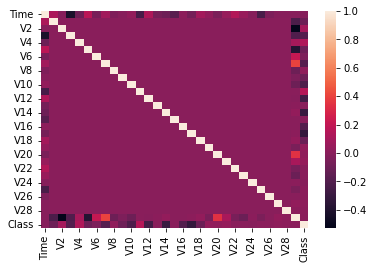

In [8]:
sns.heatmap(corr)

We are given that PCA was implemented already on the given dataset, therfore there is not a much of correlation at least among the V1 to V28 calss.

But 3 features, namely, Time, Amount and Class are the original ones, that is no pca was applied to them, lets see their correlation

In [9]:
corr["Time"].sort_values(ascending=False)

Time      1.000000
V5        0.173072
V22       0.144059
V12       0.124348
V1        0.117396
V18       0.090438
V7        0.084714
V23       0.051142
V21       0.044736
V10       0.030617
V19       0.028975
V16       0.011903
V27      -0.005135
V9       -0.008660
V28      -0.009413
V2       -0.010593
Amount   -0.010596
Class    -0.012323
V24      -0.016182
V8       -0.036949
V26      -0.041407
V20      -0.050866
V6       -0.063016
V13      -0.065902
V17      -0.073297
V14      -0.098757
V4       -0.105260
V15      -0.183453
V25      -0.233083
V11      -0.247689
V3       -0.419618
Name: Time, dtype: float64

In [10]:
corr["Amount"].sort_values(ascending=False)

Amount    1.000000
V7        0.397311
V20       0.339403
V6        0.215981
V21       0.105999
V4        0.098732
V18       0.035650
V14       0.033751
V27       0.028825
V28       0.010258
V17       0.007309
Class     0.005632
V13       0.005293
V24       0.005146
V11       0.000104
V15      -0.002986
V26      -0.003208
V16      -0.003910
V12      -0.009542
Time     -0.010596
V9       -0.044246
V25      -0.047837
V19      -0.056151
V22      -0.064801
V10      -0.101502
V8       -0.103079
V23      -0.112633
V3       -0.210880
V1       -0.227709
V5       -0.386356
V2       -0.531409
Name: Amount, dtype: float64

In [11]:
corr["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [12]:
total_frauds = len(df[df["Class"] == 1]) # total_frauds = 492

We will learn from half of the frauds and then try to predict the rest half of the frauds

In [13]:
total_examples = len(df)

In [14]:
frauds = df[df["Class"] == 1]

In [15]:
not_frauds = df[df["Class"] == 0]

In [16]:
frauds = frauds.sample(frac = 1) #shuffle the frauds

In [17]:
not_frauds = not_frauds.sample(frac = 1)

In [18]:
frauds_training = frauds[:total_frauds//2]
frauds_testing = frauds[total_frauds//2 :]

In [19]:
not_frauds_training = not_frauds[:total_frauds//2] #its len is 246
not_frauds_testing = not_frauds[total_frauds//2 :] # its len is 284069

In [20]:
df_training = pd.concat(objs=[frauds_training, not_frauds_training])
df_testing = pd.concat(objs=[frauds_testing, not_frauds_testing])
df_training = df_training.sample(frac=1)
df_testing = df_testing.sample(frac=1)

In [21]:
len(df_training) #it comprises equal number of fraud and non fraud transactions

492

In [22]:
len(df_testing)

284315

In [23]:
df_training.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13088,22976.0,-0.569848,1.014669,1.854790,0.183448,0.416045,-0.550748,0.983211,-0.455727,0.707403,...,-0.038848,0.338891,-0.213192,0.401143,-0.133847,0.281457,-0.233639,-0.128506,24.21,0
160184,113154.0,-1.383524,-0.664584,1.842021,-3.826554,0.067715,-0.389561,0.209225,0.290994,1.573235,...,0.215278,0.355360,-0.106182,0.684735,0.770016,-1.046582,0.033594,0.076237,99.99,0
238366,149640.0,0.754316,2.379822,-5.137274,3.818392,0.043203,-1.285451,-1.766684,0.756711,-1.765722,...,0.397058,0.141165,0.171985,0.394274,-0.444642,-0.263189,0.304703,-0.044362,2.00,1
259303,159054.0,-6.715884,6.170657,-4.095526,-1.496508,-1.973730,-1.850369,-0.636830,1.843331,3.858374,...,-0.324880,0.979968,0.288205,-0.023504,0.253358,-0.360710,0.099518,-0.979289,0.99,0
215163,139962.0,-2.301927,2.006963,-0.017366,-1.203718,0.222056,1.368628,-1.121390,-2.670765,0.563269,...,3.112345,-1.184520,0.530663,-0.286211,-0.598448,-0.740938,-0.575139,0.150276,5.00,0


In [24]:
X_train = df_training.drop(labels="Class", axis = 1)
y_train = df_training["Class"]

In [25]:
X_test = df_testing.drop(labels="Class", axis = 1)
y_test = df_testing["Class"]

<p style="font-size:32px; color:red; margin-top: 40px">Model Building</p>

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [27]:
svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=10000)),
 ])

In [28]:
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', max_iter=10000))])

In [29]:
predictions = svm_clf.predict(X_test)

In [30]:
len(predictions)

284315

In [31]:
len(y_test)

284315

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_test, predictions)

array([[273688,  10381],
       [    27,    219]], dtype=int64)

In [34]:
fraud_detection_accuracy = (225)/(225 + 21)*100
total_accuracy = (274266 + 225) / ( (274266 + 225) + (21 + 9803) )

In [35]:
fraud_detection_accuracy #out of 10, 9 frauds are being detected

91.46341463414635

In [36]:
total_accuracy

0.9654467755834198

**our dataset learned from 492 samples and predicted 2,84,315 samples**